In [1]:
#STEP 1 : Import necessary packages
%matplotlib inline
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
#STEP 2 : Read the data and present summary

data = pd.read_csv('../input/glass/glass.csv')
print(data.head(10))
print(data.info())
print(data.describe())

        RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-

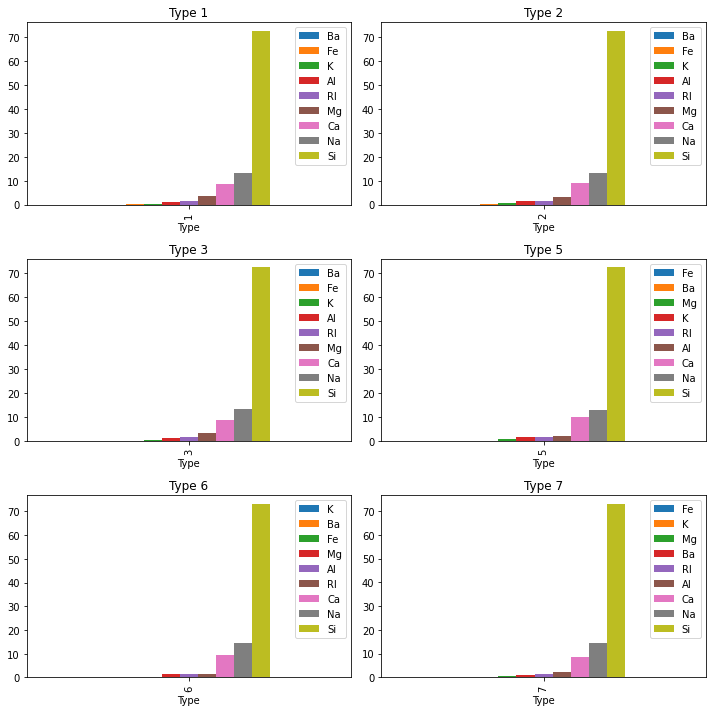

In [3]:
###### There are six types (I don't know why there's no type 4.)

mean_of_type = data.groupby('Type').mean()

fig, axes = plt.subplots(nrows = 3, ncols = 2)

index_set = [1,2,3,5,6,7]

for i in range(3):
    for j in range(2):
        mean_of_type.loc[mean_of_type.index==index_set[2*i+j]].sort_values(by = index_set[2*i+j], axis = 1).plot(ax = axes[i][j], kind = 'bar', figsize=(10,10))
        axes[i][j].set_title('Type {ind}'.format(ind = index_set[2*i+j]))
        
plt.tight_layout()
plt.show()

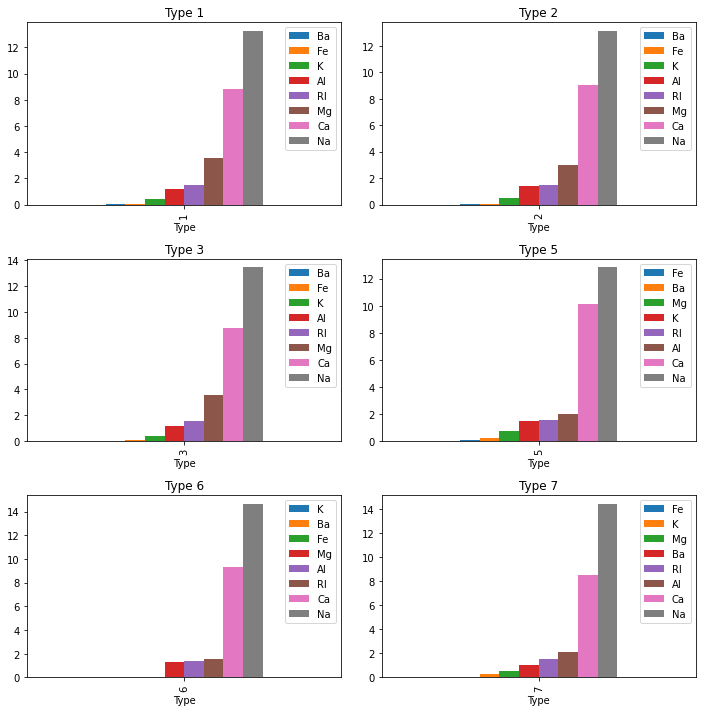

In [4]:
###### Let us repeat EDA with dropping the contribution of Si

dropSi = data.drop(columns = ['Si'])

mean_of_type_dropSi = dropSi.groupby('Type').mean()

fig, axes = plt.subplots(nrows = 3, ncols = 2)

index_set = [1,2,3,5,6,7]

for i in range(3):
    for j in range(2):
        mean_of_type_dropSi.loc[mean_of_type_dropSi.index==index_set[2*i+j]].sort_values(by = index_set[2*i+j], axis = 1).plot(ax = axes[i][j], kind = 'bar', figsize=(10,10))
        axes[i][j].set_title('Type {ind}'.format(ind = index_set[2*i+j]))
        
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

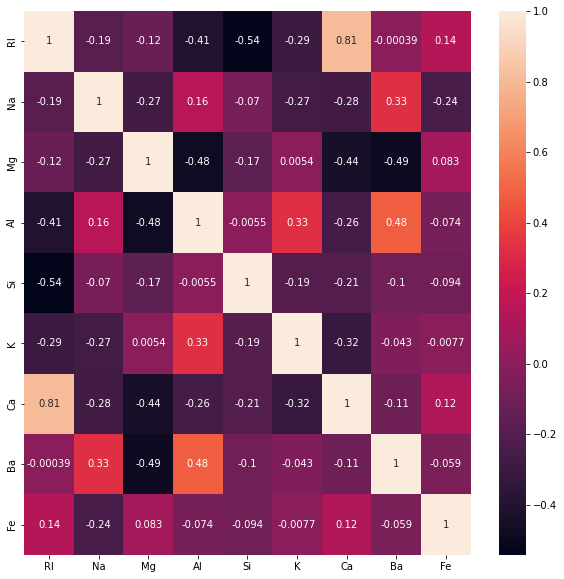

In [5]:
# Step 3 : Correlation and heatmap

data_droptype = data.drop(columns = ['Type'])

plt.clf()
fig, axes = plt.subplots(figsize = (10, 10))
sns.heatmap(data_droptype.corr(), annot = True, ax = axes)
plt.show()

# From this heatmap, we see that Ca and RI has high correlation!

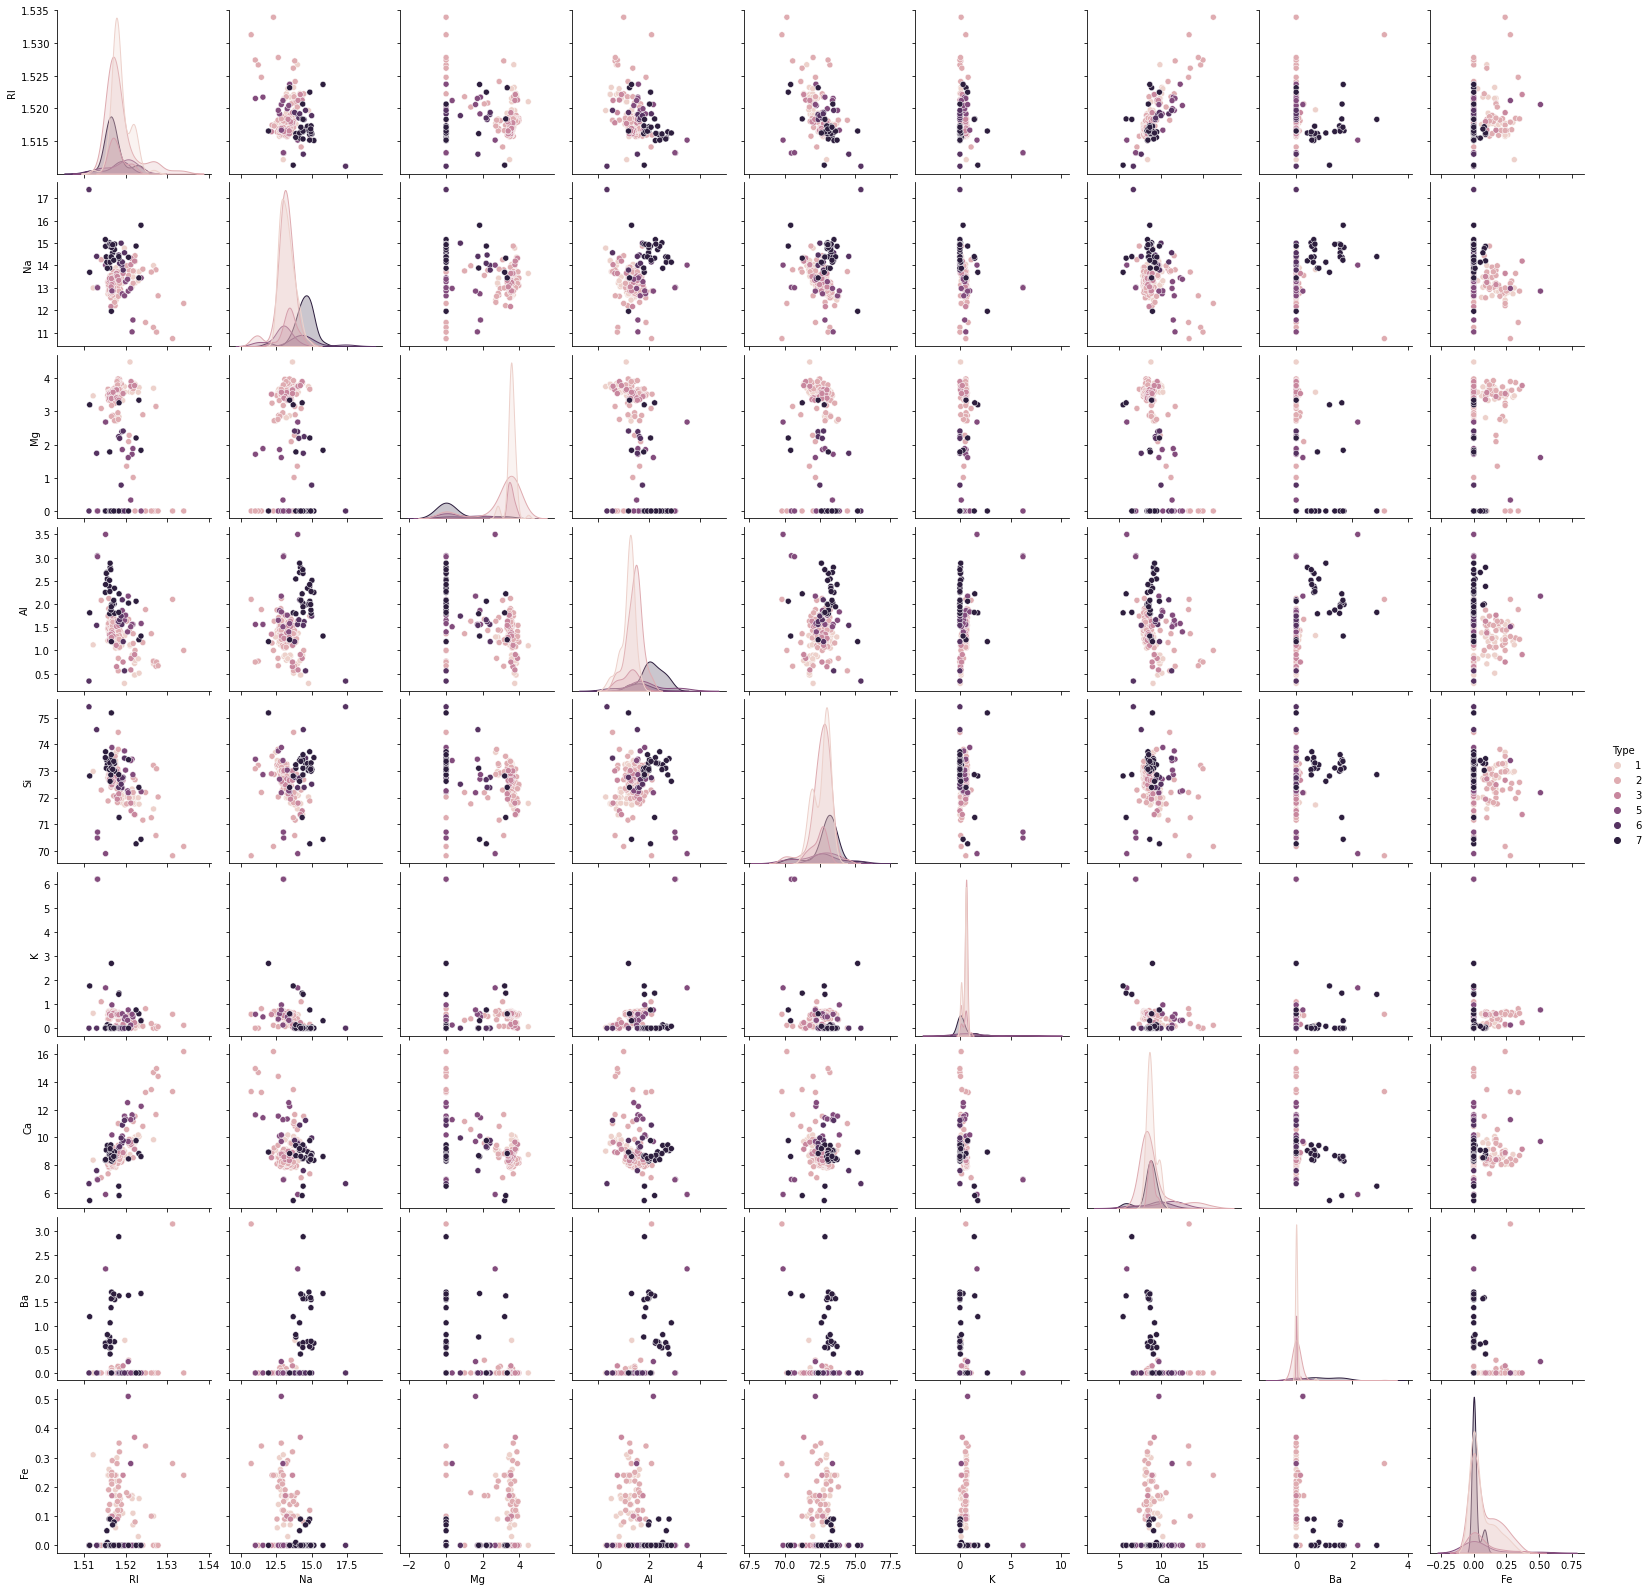

In [6]:
sns.pairplot(data, hue = 'Type')

<Figure size 432x288 with 0 Axes>

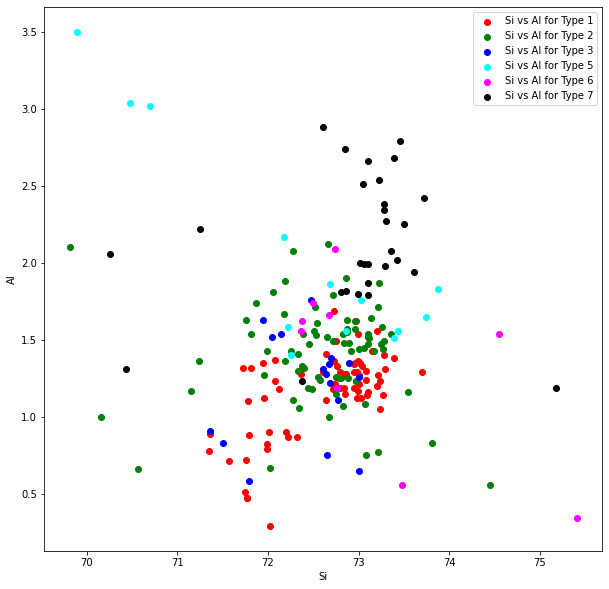

In [7]:
# Scatter plot (Si versus Al)

Type = [0]*6
ColorList = ['red', 'green', 'blue', 'cyan', 'magenta', 'black']

for i in range(6):
    Type[i] = data.loc[data.Type==index_set[i]]
    
CompareIngredient = ['Si', 'Al']
    
plt.clf()    
plt.figure(figsize=(10,10))
for i in range(6):
    plt.scatter(Type[i][CompareIngredient[0]], Type[i][CompareIngredient[1]], color = ColorList[i], label = "{} vs {} for Type {}".format(CompareIngredient[0], CompareIngredient[1], index_set[i]))
    plt.xlabel(CompareIngredient[0])
    plt.ylabel(CompareIngredient[1])
    plt.legend()


<Figure size 432x288 with 0 Axes>

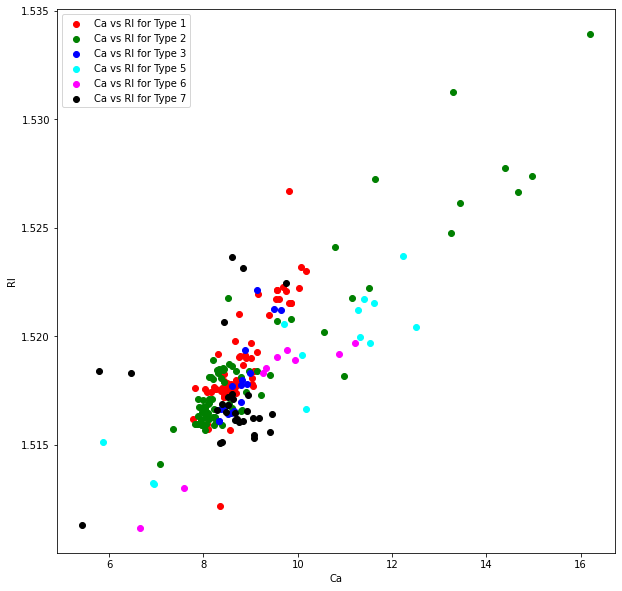

In [8]:
# Scatter plot (Ca versus RI) : As expected from the heatmap, there is a strong linear relationship.

Type = [0]*6
ColorList = ['red', 'green', 'blue', 'cyan', 'magenta', 'black']

for i in range(6):
    Type[i] = data.loc[data.Type==index_set[i]]
    
CompareIngredient = ['Ca', 'RI']
    
plt.clf()    
plt.figure(figsize=(10,10))
for i in range(6):
    plt.scatter(Type[i][CompareIngredient[0]], Type[i][CompareIngredient[1]], color = ColorList[i], label = "{} vs {} for Type {}".format(CompareIngredient[0], CompareIngredient[1], index_set[i]))
    plt.xlabel(CompareIngredient[0])
    plt.ylabel(CompareIngredient[1])
    plt.legend()

In [9]:
# STEP 4 : Application of KNN. To apply this method, we first normalize the data. 
# Here we use the standardization

x = data.drop(["Type"],axis = 1)
y = data.Type.values

x_data = (x - x.mean())/(x.std()).values
y_data = y

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 5)

In [10]:
knn = KNN(n_neighbors=7)

knn.fit(X_train, y_train)

pretiction = knn.predict(X_test)

print("{} knn score: {}".format(7,knn.score(X_test, y_test)))

7 knn score: 0.6923076923076923


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


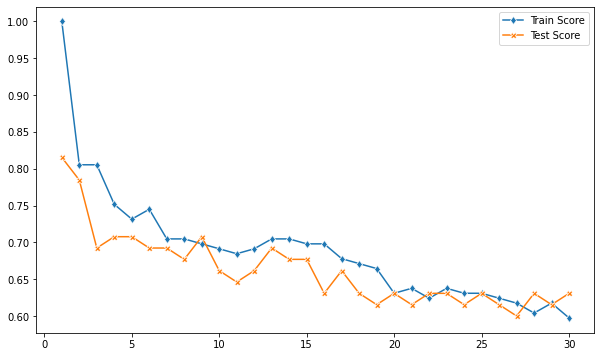

In [11]:
test_score_list = []
train_score_list = []

for i in range(1, 31):
    knnModel = KNN(n_neighbors = i)
    knnModel.fit(X_train, y_train)
    train_score_list.append(knnModel.score(X_train, y_train))
    test_score_list.append(knnModel.score(X_test, y_test))
    
plt.figure(figsize = (10,6))
p = sns.lineplot(range(1,31),train_score_list,marker='d',label='Train Score')
p = sns.lineplot(range(1,31),test_score_list,marker='X',label='Test Score')

In [12]:
# Use GridSearchCV to find the best n_neighbor

param_grid = {'n_neighbors' : np.arange(1, 50)}

knn_model2 = KNN()
knn_model2_cv = GridSearchCV(knn_model2, param_grid, cv = 5)
knn_model2_cv.fit(X_test, y_test)

print("Best Score:" + str(knn_model2_cv.best_score_))
print("Best Parameters: " + str(knn_model2_cv.best_params_))

# The result is highly sensitive to the Random seed.

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Best Score:0.6461538461538462
Best Parameters: {'n_neighbors': 1}


# # The result of KNN method is not so satisfactory. Furthermore, it is very sensitive to the random seed. Let us now try with RandomForest and SVC!

In [13]:
# STEP 5 : ML with RandomForest Classifier

rf = RandomForestClassifier()
param_rf = {'n_estimators' : [50, 100, 150, 200, 250, 300], 'criterion' : ['gini', 'entropy']}
rf_cv = GridSearchCV(rf, param_rf, cv = 5)
rf_cv.fit(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [14]:
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'criterion': 'entropy', 'n_estimators': 300}
0.7076923076923076


In [15]:
rf_final = RandomForestClassifier(250, max_depth = 5, random_state = 16, criterion = 'entropy')
rf_final.fit(X_train, y_train)
rf_final.score(X_train, y_train), rf_final.score(X_test, y_test)

# This result is a bit better than KNN method!
# Signal of Overfitting?

(0.9261744966442953, 0.7230769230769231)

In [16]:
# STEP 6 : ML with SVC

svm = SVC()
param_svm = {'C' : [1, 10, 100, 1000, 10000], 'kernel' : ['rbf']}
svm_cv = GridSearchCV(svm, param_svm, cv =5)
svm_cv.fit(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000], 'kernel': ['rbf']})

In [17]:
print(svm_cv.best_params_)
print(svm_cv.best_score_)

# Result is compatible to the KNN, worse than RandomForest Classifier.

{'C': 100, 'kernel': 'rbf'}
0.6307692307692307
